<a href="https://colab.research.google.com/github/singhmansi25/Fire-Incidents-Analysis-Project/blob/main/EDA_Project_Fire_Incidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Required Libraries**

In [1]:
# library used for data manipulation & analysis 
import pandas as pd   
# library used for working with arrays & linear algebra
import numpy as np
# library used for data visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# library used for statistics & mathematical calculation
import statistics
import scipy.stats as stats
# library used for date time conversion
from datetime import datetime

## **Loading the Dataset**

In [2]:
fire_df = pd.read_csv('/content/drive/MyDrive/Fire-Incidents.csv')

## **Reading the Dataset**

In [3]:
# reading first 5 rows of dataset
fire_df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [4]:
# reading last 5 rows of dataset
fire_df.tail()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
11209,"Trash, Rubbish Storage (inc garbage chute room...",No business interruption,0,0,0,0,2018-02-23T14:41:51,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.373778,"Rubbish, Trash, Waste",Extinguished by automatic system,Improperly Discarded,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with no evidence from street,2018-02-23T14:35:03,2018-02-23T14:38:33
11210,Other Storage Area,No business interruption,0,0,1000,0,2018-02-24T01:42:03,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.280725,Undetermined (formerly 98),Extinguished by occupant,Electrical Failure,General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-02-24T01:30:45,2018-02-24T01:36:59
11211,Other Storage Area,No business interruption,0,0,0,0,2018-02-24T02:40:00,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.280725,Electrical Wiring Insulation,Extinguished by occupant,"Other unintentional cause, not classified",General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-02-24T02:30:33,2018-02-24T02:35:07
11212,Porch or Balcony,Not applicable (not a business),6,0,100000,1,2018-02-24T00:44:00,Confined to part of room/area of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.500863,"Paper, Cardboard",Extinguished by fire department,Improperly Discarded,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Battery operated,Flames showing from small area (one storey or ...,2018-02-24T00:34:12,2018-02-24T00:38:47
11213,"Trash, Rubbish Storage (inc garbage chute room...",No business interruption,0,0,100,0,2018-02-24T08:33:18,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.589233,"Rubbish, Trash, Waste",Extinguished by fire department,Improperly Discarded,Hardware Store,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Fire with no evidence from street,2018-02-24T08:22:30,2018-02-24T08:27:21


In [5]:
# finding shape of dataset
fire_df.shape

(11214, 27)

The Dataset has:

    Number of Rows:      11214
    Number of Columns:   27

In [6]:
# finding information about columns present in dataset
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

The Dataset has:
    
    Number of column with Float type variable:    3
    Number of column with Int type variable:      5
    Number of column with Object type variable:   19

But we see that Columns with Date & Time values are in object format. Let's change it into date-time format.

### **Converting Timestamp to Date Time format**

The timestamps are string values and need to be converted to datetime objects to do feature engineering.

In [7]:
# Converting Columns in object type to Date-time format.
fire_df['Ext_agent_app_or_defer_time'] = pd.to_datetime(fire_df['Ext_agent_app_or_defer_time'])
fire_df['Fire_Under_Control_Time'] = pd.to_datetime(fire_df['Fire_Under_Control_Time'])
fire_df['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(fire_df['Last_TFS_Unit_Clear_Time'])
fire_df['TFS_Alarm_Time'] = pd.to_datetime(fire_df['TFS_Alarm_Time'])
fire_df['TFS_Arrival_Time'] = pd.to_datetime(fire_df['TFS_Arrival_Time'])

In [8]:
# finding information about columns present in dataset
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11214 non-null  object        
 1   Business_Impact                           11214 non-null  object        
 2   Civilian_Casualties                       11214 non-null  int64         
 3   Count_of_Persons_Rescued                  11214 non-null  int64         
 4   Estimated_Dollar_Loss                     11214 non-null  int64         
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64         
 6   Ext_agent_app_or_defer_time               11214 non-null  datetime64[ns]
 7   Extent_Of_Fire                            11214 non-null  object        
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object        
 9   Fire_Alarm_System_Operation 

The Dataset has:
    
    Number of column with Float type variable:      3
    Number of column with Int type variable:        5
    Number of column with Datetime type variable:   5
    Number of column with Object type variable:     14

## **Inspecting Null Columns**

In [9]:
# finding columns with null values
fire_df.isnull().sum()

Area_of_Origin                               0
Business_Impact                              0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Dollar_Loss                        0
Estimated_Number_Of_Persons_Displaced        0
Ext_agent_app_or_defer_time                  0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use 

## **Handling Null Values**

As only Column 'Incident Ward' has null values, let's inspect this column. 

In [10]:
# analysing unique values in the column.
fire_df['Incident_Ward'].unique()

array([18.,  7., 27., 20.,  5., 15., 14., 17., 29.,  9.,  8., 42., 22.,
       36., 43.,  1., 28., 33., 24., 35., 37., 30., 34., 11., 10.,  6.,
       21.,  4., 19., 26., 44., 32., 23., 25., 38., 31.,  2., 13., 12.,
       16.,  3., 40., 41., nan, 39.])

As Incident Ward column signifies Ward code of the area where the incident occurred, we can replace null values with 0.

In [11]:
# replacing null values 0
fire_df['Incident_Ward'].fillna(0, inplace=True)

In [12]:
# again calculating number of null values in each column
fire_df.isnull().sum()

Area_of_Origin                              0
Business_Impact                             0
Civilian_Casualties                         0
Count_of_Persons_Rescued                    0
Estimated_Dollar_Loss                       0
Estimated_Number_Of_Persons_Displaced       0
Ext_agent_app_or_defer_time                 0
Extent_Of_Fire                              0
Fire_Alarm_System_Impact_on_Evacuation      0
Fire_Alarm_System_Operation                 0
Fire_Alarm_System_Presence                  0
Fire_Under_Control_Time                     0
Ignition_Source                             0
Incident_Station_Area                       0
Incident_Ward                               0
Last_TFS_Unit_Clear_Time                    0
Latitude                                    0
Longitude                                   0
Material_First_Ignited                      0
Method_Of_Fire_Control                      0
Possible_Cause                              0
Property_Use                      

## **Analysing Numerical Columns**

In [13]:
# describing the mathematical features of Numerical Columns using count, mean, standard deviation, minimum value, maximum value,
# 25th, 50th, 75th percentile values.
fire_df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.525058,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.793265,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,0.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,9.250000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


In [14]:
# describing the mathematical features of Numerical Columns using mean, median, most common, least common, variance, 
# standard deviation, minimum value, maximum value, skew, kurtosis, mean absolute deviation to understand in better way
# by creating a dictionary of columns and their related numerical features.
explore_dict = {
    'Mean' : [fire_df.Civilian_Casualties.mean(), fire_df.Count_of_Persons_Rescued.mean(), 
                fire_df.Estimated_Dollar_Loss.mean(), fire_df.Estimated_Number_Of_Persons_Displaced.mean(), 
                fire_df.Incident_Station_Area.mean(), fire_df.Incident_Ward.mean()],
    
    'Median' : [statistics.median(fire_df.Civilian_Casualties), statistics.median(fire_df.Count_of_Persons_Rescued),
                statistics.median(fire_df.Estimated_Dollar_Loss), statistics.median(fire_df.Estimated_Number_Of_Persons_Displaced),
                statistics.median(fire_df.Incident_Station_Area), statistics.median(fire_df.Incident_Ward)],
    
    'Min Value' : [fire_df.Civilian_Casualties.min(), fire_df.Count_of_Persons_Rescued.min(), 
                   fire_df.Estimated_Dollar_Loss.min(), fire_df.Estimated_Number_Of_Persons_Displaced.min(), 
                   fire_df.Incident_Station_Area.min(), fire_df.Incident_Ward.min()],
    
    'Max Value' : [fire_df.Civilian_Casualties.max(), fire_df.Count_of_Persons_Rescued.max(), 
                   fire_df.Estimated_Dollar_Loss.max(), fire_df.Estimated_Number_Of_Persons_Displaced.max(), 
                   fire_df.Incident_Station_Area.max(), fire_df.Incident_Ward.max()],
    
    'Most Common' : [fire_df.Civilian_Casualties.value_counts().idxmax(), fire_df.Count_of_Persons_Rescued.value_counts().idxmax(), 
                           fire_df.Estimated_Dollar_Loss.value_counts().idxmax(), fire_df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmax(), 
                           fire_df.Incident_Station_Area.value_counts().idxmax(), fire_df.Incident_Ward.value_counts().idxmax()],
    
    'Least Common' : [fire_df.Civilian_Casualties.value_counts().idxmin(), fire_df.Count_of_Persons_Rescued.value_counts().idxmin(), 
                            fire_df.Estimated_Dollar_Loss.value_counts().idxmin(), fire_df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmin(), 
                            fire_df.Incident_Station_Area.value_counts().idxmin(), fire_df.Incident_Ward.value_counts().idxmin()],
    
    'Variance' : [statistics.variance(fire_df.Civilian_Casualties), statistics.variance(fire_df.Count_of_Persons_Rescued),
                statistics.variance(fire_df.Estimated_Dollar_Loss), statistics.variance(fire_df.Estimated_Number_Of_Persons_Displaced),
                statistics.variance(fire_df.Incident_Station_Area), statistics.variance(fire_df.Incident_Ward)],
    
    'St. Dev' : [statistics.stdev(fire_df.Civilian_Casualties), statistics.stdev(fire_df.Count_of_Persons_Rescued),
                 statistics.stdev(fire_df.Estimated_Dollar_Loss), statistics.stdev(fire_df.Estimated_Number_Of_Persons_Displaced),
                 statistics.stdev(fire_df.Incident_Station_Area), statistics.stdev(fire_df.Incident_Ward)],
    
    'Skew' : [fire_df.Civilian_Casualties.skew(), fire_df.Count_of_Persons_Rescued.skew(), 
              fire_df.Estimated_Dollar_Loss.skew(), fire_df.Estimated_Number_Of_Persons_Displaced.skew(), 
              fire_df.Incident_Station_Area.skew(), fire_df.Incident_Ward.skew()],
    
    'Kurtosis' : [fire_df.Civilian_Casualties.kurt(), fire_df.Count_of_Persons_Rescued.kurt(), 
                  fire_df.Estimated_Dollar_Loss.kurt(), fire_df.Estimated_Number_Of_Persons_Displaced.kurt(), 
                  fire_df.Incident_Station_Area.kurt(), fire_df.Incident_Ward.kurt()],
    
    'Mean Absolute Deviation' : [fire_df.Civilian_Casualties.mad(), fire_df.Count_of_Persons_Rescued.mad(), 
                                 fire_df.Estimated_Dollar_Loss.mad(), fire_df.Estimated_Number_Of_Persons_Displaced.mad(), 
                                 fire_df.Incident_Station_Area.mad(), fire_df.Incident_Ward.mad()],
}


In [15]:
# creating a dataframe from dictionary
explore_df = pd.DataFrame(explore_dict, index = ['Civilian Casualties', 'Count of persons rescued',
                                                 'Estimated Dollar Loss', 'Estimated Number of Persons Displaced',
                                                 'Incident Station Area', 'Incident Ward'])
explore_df.head()

,Mean,Median,Min Value,Max Value,Most Common,Least Common,Variance,St. Dev,Skew,Kurtosis,Mean Absolute Deviation
Civilian Casualties,0.112538,0.0,0.0,15.0,0.0,15.0,2.083276e-01,0.456429,8.455166,149.308247,0.205988
Count of persons rescued,0.062154,0.0,0.0,86.0,0.0,86.0,9.265744e-01,0.962587,67.355363,5747.892245,0.120684
Estimated Dollar Loss,42943.693419,2500.0,0.0,50000000.0,0.0,15600.0,2.850884e+11,533936.667426,76.107737,6892.877165,63425.666540
Estimated Number of Persons Displaced,17.274835,0.0,0.0,999.0,0.0,230.0,1.417807e+04,119.071696,7.929017,61.853362,31.293370
Incident Station Area,288.281880,314.0,111.0,445.0,426.0,346.0,1.155969e+04,107.515995,-0.154630,-1.215131,94.124758


The above statistics show that most values in civilian casualties, persons rescued, dollar loss and persons displaced fall close to 0.

The maximum values are much higher than the mean and median indicating a lot of outliers.

The data is already relatively clean however some cleaning is required:


*   The categorical columns have far too many categories and many of these categories have too few observations.

*   Outliers need to be removed







## **Let's analyse Place of origin where fire incident took place and which property got affected.**

In [16]:
# Analysing Area of Origin column, to understand more fire accident prone areas.
fire_df['Area_of_Origin'].value_counts(normalize=True)*100

Cooking Area or Kitchen                                             25.593009
Porch or Balcony                                                     8.471553
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        7.740325
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     6.696986
Living Area (e.g. living, TV, recreation, etc)                       5.296950
                                                                      ...    
Under Investigation                                                  0.044587
Running Gear (inc wheels and braking systems, transmission syste     0.035670
Incinerator Room                                                     0.026752
Records storage area (inc vaults)                                    0.017835
Fuel Dispensing Area (outside)                                       0.008917
Name: Area_of_Origin, Length: 73, dtype: float64

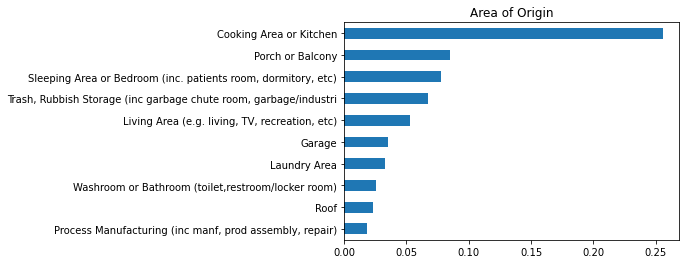

In [17]:
# Now we will plot a graph for top 10 values of area of origin
plt.title('Area of Origin')
fire_df['Area_of_Origin'].value_counts(normalize = True, ascending = True)[-10:].plot(kind='barh')
plt.show()

The column has unique values with the most common value being '**Cooking area or Kitchen**' representing 25.6% of entries.


'Area of Origin' has too many categories. Let's find those which are important for analysis.

In [18]:
# Displaying all the distincts values present in the column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fire_df['Area_of_Origin'].value_counts())

Cooking Area or Kitchen                                                 2870
Porch or Balcony                                                         950
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)            868
Trash, Rubbish Storage (inc garbage chute room, garbage/industri         751
Living Area (e.g. living, TV, recreation, etc)                           594
Garage                                                                   392
Laundry Area                                                             365
Washroom or Bathroom (toilet,restroom/locker room)                       288
Roof                                                                     259
Process Manufacturing (inc manf, prod assembly, repair)                  201
Other - unclassified                                                     201
Chimney/Flue Pipe                                                        197
Engine Area                                                              176

There is a small dropoff in values after 'Attached Deck' where the remaining categories have at least close to 100 observations, This cutoff is arbitrary and a better cutoff might be possible with further analysis. I will group all categories with less observations than 'Attached Deck' as well as the 'Other - unclassified' category in a new 'Other' category.

In [19]:
keep_origin = ['Cooking Area or Kitchen', 
              'Porch or Balcony', 
              'Sleeping Area or Bedroom (inc. patients room, dormitory, etc)',
              'Trash, Rubbish Storage (inc garbage chute room, garbage/industri',
              'Living Area (e.g. living, TV, recreation, etc)',
              'Garage',
              'Laundry Area',
              'Washroom or Bathroom (toilet,restroom/locker room)'
              'Roof',
              'Chimney/Flue Pipe',
              'Engine Area',
              'Trash, rubbish area (outside)',
              'Mechanical/Electrical Services Room',
              'Basement/cellar (not partitioned)',
              'Exterior Wall',
              'Other Outside Area',
              'Hallway, Corridor',
              'Electrical Systems',
              'HVAC Equipment Room (furnace room, water heater closet, boiler)',
              'Court, Patio, Terrace',
              'Attached Deck']

In [20]:
for i in fire_df['Area_of_Origin']:
    if i not in keep_origin:
        fire_df['Area_of_Origin'] = np.where((fire_df.Area_of_Origin == i), 'Other', fire_df.Area_of_Origin)

In [21]:
# The remaining categories
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fire_df['Area_of_Origin'].value_counts())

Cooking Area or Kitchen                                             2870
Other                                                               2681
Porch or Balcony                                                     950
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        868
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     751
Living Area (e.g. living, TV, recreation, etc)                       594
Garage                                                               392
Laundry Area                                                         365
Chimney/Flue Pipe                                                    197
Engine Area                                                          176
Trash, rubbish area (outside)                                        173
Mechanical/Electrical Services Room                                  169
Basement/cellar (not partitioned)                                    159
Exterior Wall                                      

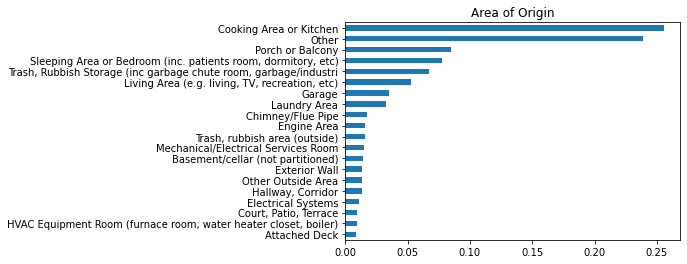

In [22]:
plt.title('Area of Origin')
fire_df['Area_of_Origin'].value_counts( normalize=True, ascending=True).plot(kind='barh')
plt.show()

In [25]:
# Analysing Property Use column, to understand more fire accident prone areas.
fire_df['Property_Use'].value_counts(normalize=True)*100

Multi-Unit Dwelling - Over 12 Units                               33.163902
Detached Dwelling                                                 20.670590
Semi-Detached Dwelling                                             6.500803
Attached Dwelling (eg. rowhouse, townhouse, etc.)                  5.163189
Multi-Unit Dwelling - 2 to 6 Units                                 2.505796
                                                                    ...    
Hotel, Motel, Lodging - Less than 4 guests or suites (inc B&B)     0.008917
Market - Outdoors (flowers, fruit, vegetable sales)                0.008917
Automobile                                                         0.008917
Sto: Tank, Tank Farm, Other Liquids                                0.008917
Heating Plant - central/district heating plant, steam, etc         0.008917
Name: Property_Use, Length: 217, dtype: float64

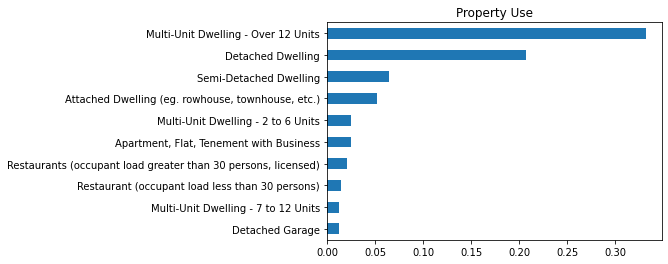

In [29]:
# Now we will plot a graph for top values for it.
plt.title('Property Use')
fire_df['Property_Use'].value_counts(normalize=True, ascending=True)[-10:].plot(kind='barh')
plt.show()

This describes the use of property that had an incident with most common being '**Multi-unit dwelling**' with 33% while '**Detached dwelling**' consist of 20%.

The column '**Property Use** has too many categories, let's analyse in detail.

In [39]:
keep_use = ['Multi-Unit Dwelling - Over 12 Units',
            'Detached Dwelling',
            'Semi-Detached Dwelling',
            'Attached Dwelling (eg. rowhouse, townhouse, etc.)',
            'Multi-Unit Dwelling - 2 to 6 Units',
            'Apartment, Flat, Tenement with Business',
            'Restaurants (occupant load greater than 30 persons, licensed)',
            'Restaurant (occupant load less than 30 persons)',
            'Multi-Unit Dwelling - 7 to 12 Units',
            'Detached Garage',
            'Subway Station',
            'Rooming/Boarding/Lodging House',
            'General Business Office',
            'Motor Vehicle Repair Garage']

In [40]:
for i in fire_df['Property_Use']:
    if i not in keep_use:
        fire_df['Property_Use'] = np.where((fire_df.Property_Use == i), 'Other', fire_df.Property_Use)

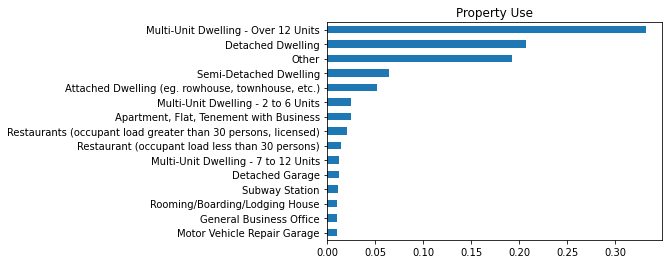

In [41]:
plt.title('Property Use')
fire_df['Property_Use'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

## **Let's analyse which Business got affected the most due to fire incidents.**

In [23]:
# Analysing Business impact column, to understand if business were impacted due to fire and what were they?
fire_df['Business_Impact'].value_counts(normalize=True)*100

Not applicable (not a business)         45.514535
No business interruption                40.048154
Undetermined                             6.723738
May resume operations within a week      5.724987
May resume operations within a month     1.123596
May not resume operations                0.561798
May resume operations within a year      0.303192
Name: Business_Impact, dtype: float64

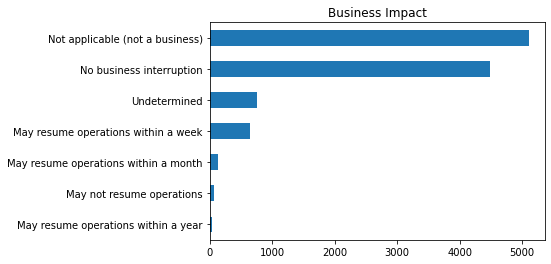

In [24]:
# Now we will plot a graph for top values for it.
plt.title('Business Impact')
fire_df['Business_Impact'].value_counts(ascending=True).plot(kind='barh')
plt.show()

**'Not applicable (no business)'** and **'No business interruption'** represents
86% of entries.

That is business was not impacted in 86% of the fire cases.

## Let's analyse Dollar Loss due to Fire Incidents

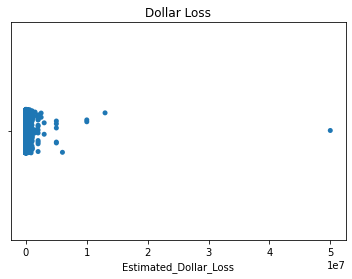

In [42]:
plt.title('Dollar Loss')
sns.stripplot(data=fire_df, x='Estimated_Dollar_Loss')
plt.show()

Since most data has a value of 0 the plots don't show the values very well. To show all the values the following plots exclude all 0 values.

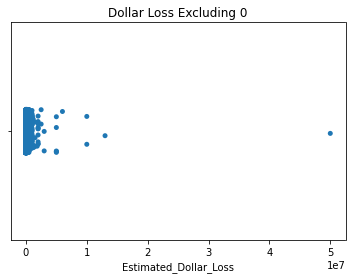

In [43]:
plt.title('Dollar Loss Excluding 0')
loss_nozero = fire_df[(fire_df.Estimated_Dollar_Loss > 0)]
sns.stripplot(data=loss_nozero, x='Estimated_Dollar_Loss')
plt.show()

These strange values are removed as well as one massive outlier in the dollar loss column

In [44]:
fire_df = fire_df[(fire_df.Estimated_Dollar_Loss < 40000000)]

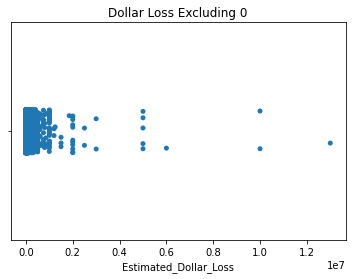

In [46]:
plt.title('Dollar Loss Excluding 0')
sns.stripplot(data=fire_df, x='Estimated_Dollar_Loss')
plt.show()

## **Let's analyse Possible causes of Fire, ignition source, material that caused ignition, and extent of fire.**

In [54]:
# Let's analyse the Possible cause of fire.
fire_df['Possible_Cause'].value_counts(normalize=True)*100

Undetermined                                                         15.455275
Electrical Failure                                                   14.144297
Unattended                                                           13.983769
Improperly Discarded                                                 12.940337
Other unintentional cause, not classified                             9.408722
Improper handling of ignition source or ignited material              7.205922
Unintentional, cause undetermined                                     5.868189
Routine maintenance deficiency, eg creosote, lint, grease buildup     4.628556
Design/Construction/Installation/Maintenance Deficiency               3.968608
Used or Placed too close to combustibles                              3.442433
Other misuse of ignition source/material ignited                      2.407919
Mechanical Failure                                                    2.318737
Suspected Arson                                     

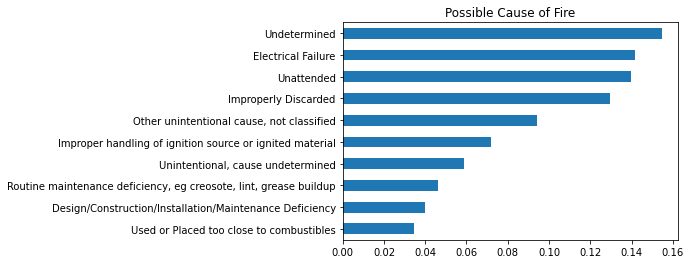

In [55]:
# Plotting a graph for it.
plt.title('Possible Cause of Fire')
fire_df['Possible_Cause'].value_counts(normalize = True, ascending=True)[-10:].plot(kind='barh')
plt.show()

In [47]:
# Let's analyse the source of fire.
fire_df['Ignition_Source'].value_counts(normalize=True)*100

Undetermined                                                        22.036921
Stove, Range-top burner                                             17.087309
Other                                                               13.368412
Smoker's Articles (eg. cigarettes, cigars, pipes already ignited    12.093106
Oven                                                                 3.852671
Clothes Dryer                                                        2.648711
Candle                                                               2.443592
Circuit Wiring - Copper                                              2.390083
Blow Torch, Bunsen Burner                                            1.810399
Cord, Cable for Appliance, Electrical Articles                       1.801480
Cutting/Welding Equipment                                            1.623116
Other Electrical                                                     1.453670
Other Electrical Distribution Item                              

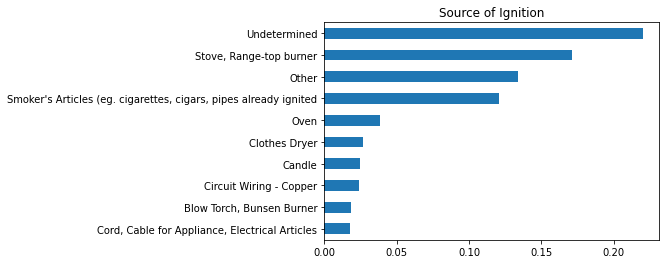

In [48]:
# Plotting a graph for it.
plt.title('Source of Ignition')
fire_df['Ignition_Source'].value_counts(normalize = True, ascending=True)[-10:].plot(kind='barh')
plt.show()

We see that there are many categories present in Ignition source, so let's analyses them in more detail.

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fire_df['Ignition_Source'].value_counts())

Undetermined                                                        2471
Stove, Range-top burner                                             1916
Smoker's Articles (eg. cigarettes, cigars, pipes already ignited    1356
Oven                                                                 432
Clothes Dryer                                                        297
Candle                                                               274
Circuit Wiring - Copper                                              268
Blow Torch, Bunsen Burner                                            203
Cord, Cable for Appliance, Electrical Articles                       202
Other                                                                194
Cutting/Welding Equipment                                            182
Other Electrical                                                     163
Other Electrical Distribution Item                                   158
Other Cooking Items (eg Toaster, Kettle, elec fryin

In [31]:
keep_ignition = ['Undetermined',
                 'Stove, Range-top burner',
                 "Smoker's Articles (eg. cigarettes, cigars, pipes already ignited",
                 'Oven',
                 'Clothes Dryer',
                 'Candle',
                 'Circuit Wiring - Copper',
                 'Blow Torch, Bunsen Burner',
                 'Cord, Cable for Appliance, Electrical Articles',
                 'Cutting/Welding Equipment',
                 'Other Electrical',
                 'Other Electrical Distribution Item',
                 'Other Cooking Items (eg Toaster, Kettle, elec frying pan)',
                 'Vehicle - Electrical',
                 'Open Fired Barbeque - Fixed or Portable',
                 "Other Open Flame Tools/Smokers' Articles",
                 'Distribution Equipment (includes panel boards, fuses, circuit br',
                 'Hot Ashes, Embers, Spark',
                 'Fireplace - Masonry',
                 'Other Appliances',
                 'Service/Utility Lines (includes power/hydro transmission lines)',
                 'Chemical Reaction (eg. spontaneous combustion, etc.)',
                 'Terminations-Copper (incl receptacles, switches, lights)',
                 'Deep Fat Fryer',
                 'Other Mechanical',
                 'Incandescent Lamp - Light Bulb, Spotlight',
                 'Extension Cord, Temporary Wiring',
                 'Wood burning stove']

In [32]:
for i in fire_df['Ignition_Source']:
    if i not in keep_ignition:
        fire_df['Ignition_Source'] = np.where((fire_df.Ignition_Source == i), 'Other', fire_df.Ignition_Source)

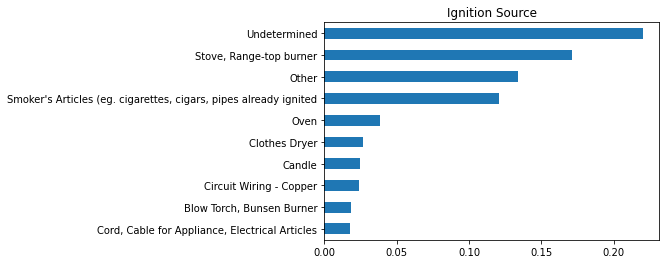

In [35]:
plt.title('Ignition Source')
fire_df['Ignition_Source'].value_counts(normalize=True, ascending=True)[-10:].plot(kind='barh')
plt.show()

In [36]:
# Let's analyse material that caused spread of fire.
fire_df['Material_First_Ignited'].value_counts(normalize=True)*100

Cooking Oil, Grease                                        12.930266
Rubbish, Trash, Waste                                      11.378634
Undetermined (formerly 98)                                 10.201534
Electrical Wiring Insulation                                6.750490
Other                                                       6.643481
Paper, Cardboard                                            3.736401
Wood                                                        3.611557
Plastic                                                     3.522383
Interior Wall/Ceiling                                       3.459961
Cabinetry                                                   3.058677
Upholstered Sofa, Chair, etc.                               2.666310
Mattress, Pillow                                            2.300696
Insulation                                                  2.086677
Other Soft Goods, Wearing Apparel                           2.059925
Multiple Objects or Materials     

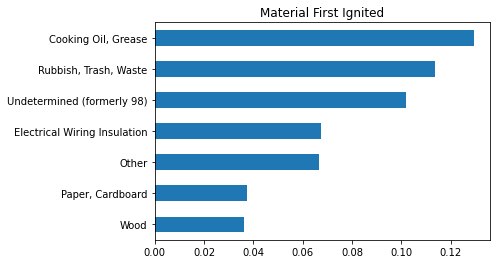

In [38]:
# Now we will plot a graph for top values for it.
plt.title('Material First Ignited')
fire_df['Material_First_Ignited'].value_counts(normalize=True, ascending=True)[-7:].plot(kind='barh')
plt.show()

This column also has lots of categories, so let's analyse in detail.

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fire_df['Material_First_Ignited'].value_counts())

Cooking Oil, Grease                                        1450
Rubbish, Trash, Waste                                      1276
Undetermined (formerly 98)                                 1144
Electrical Wiring Insulation                                757
Other                                                       745
Paper, Cardboard                                            419
Wood                                                        405
Plastic                                                     395
Interior Wall/Ceiling                                       388
Cabinetry                                                   343
Upholstered Sofa, Chair, etc.                               299
Mattress, Pillow                                            258
Insulation                                                  234
Other Soft Goods, Wearing Apparel                           231
Multiple Objects or Materials                               202
Vehicle                                 

In [49]:
keep_material = ['Cooking Oil, Grease',
                 'Rubbish, Trash, Waste',
                 'Undetermined (formerly 98)',
                 'Electrical Wiring Insulation',
                 'Paper, Cardboard',
                 'Wood',
                 'Plastic',
                 'Interior Wall/Ceiling',
                 'Cabinetry',
                 'Upholstered Sofa, Chair, etc.',
                 'Mattress, Pillow',
                 'Insulation',
                 'Other Soft Goods, Wearing Apparel',
                 'Multiple Objects or Materials',
                 'Vehicle',
                 'Linen Other than Bedding',
                 'Books, Magazines, Newspapers',
                 'Creosote (chimney, flue pipe)',
                 'Exterior Roof Covering',
                 'Bedding',
                 'Exterior Cladding',
                 'Other Building Component',
                 'Bush, Grass, Tree, Leaves, etc.',
                 'Fabric - Synthetic, Combination',
                 'Multiple diverse objects ignited',
                 'Structural Member',
                 'Other Furniture',
                 'Floor',
                 'Fabric - Natural (eg. cotton, wool, etc.)']

In [50]:
for i in fire_df['Material_First_Ignited']:
    if i not in keep_material:
        fire_df['Material_First_Ignited'] = np.where((fire_df.Material_First_Ignited == i), 'Other', fire_df.Material_First_Ignited)

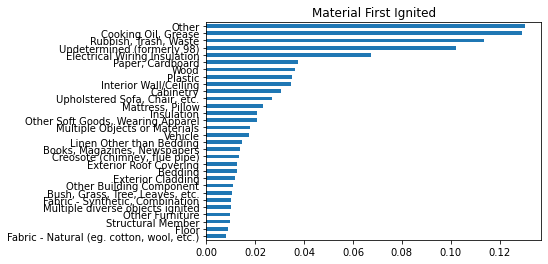

In [51]:
plt.title('Material First Ignited')
fire_df['Material_First_Ignited'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

In [52]:
# Let's analyse extent of fire.
fire_df['Extent_Of_Fire'].value_counts(normalize=True)*100

Confined to object of origin                                                    45.688041
Confined to part of room/area of origin                                         36.422010
Spread to entire room of origin                                                  4.289664
Spread beyond room of origin, same floor                                         4.182645
Confined to roof/exterior structure                                              3.050031
Spread to other floors, confined to building                                     2.443592
Spread beyond building of origin, resulted in exposure fire(s)                   1.070186
Entire Structure                                                                 0.873986
Undetermined                                                                     0.811558
Spread beyond building of origin                                                 0.499420
Multi unit bldg: spread beyond suite of origin but not to separated suite(s)     0.365647
Multi unit

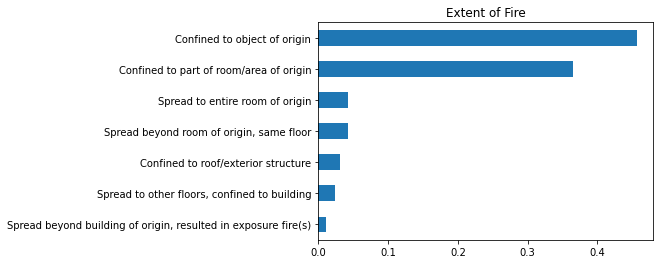

In [53]:
# Now we will plot a graph for top values for it.
plt.title('Extent of Fire')
fire_df['Extent_Of_Fire'].value_counts(normalize=True, ascending=True)[-7:].plot(kind='barh')
plt.show()

We see that '**confined to object/room of origin**' make up 82% of values.

This means the extent of fire is confined to the area of origin most of the times. 

## **Let's Analyses the Fire Alarm System Condition before incident**

In [56]:
# Let's analyse if Fire alarm system was present or not in accident area.
fire_df['Fire_Alarm_System_Presence'].value_counts(normalize=True)*100

Fire alarm system present                                                 55.426737
Not applicable (bldg not classified by OBC OR detached/semi/town home)    17.319183
No Fire alarm system                                                      15.999287
Undetermined                                                              11.254794
Name: Fire_Alarm_System_Presence, dtype: float64

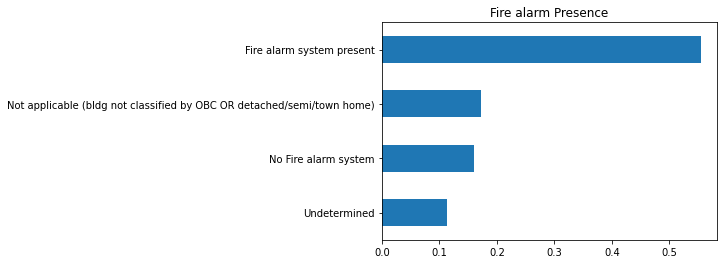

In [57]:
# Let's plot a graph for the same.
plt.title('Fire alarm Presence')
fire_df['Fire_Alarm_System_Presence'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

This shows 55% of the Fire alarm was present, however 43% of the times, it wasn't present.

In [58]:
# Let's analyse how many times the Fire alarm system worked during the accidents.
fire_df['Fire_Alarm_System_Operation'].value_counts(normalize=True)*100

Fire alarm system operated                  40.310354
Not applicable (no system)                  34.531348
Fire alarm system operation undetermined    12.726300
Fire alarm system did not operate           12.431999
Name: Fire_Alarm_System_Operation, dtype: float64

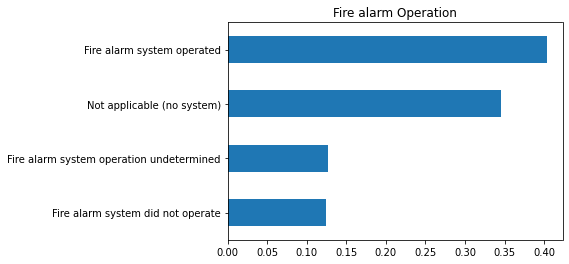

In [59]:
# Let's plot a graph for the same.
plt.title('Fire alarm Operation')
fire_df['Fire_Alarm_System_Operation'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

This shows Fire alarm system was present and operated for 40% of the cases. 

While it didn't operate for 12% of the time. 

Fire alarm wasn't present in 35% of the cases.

In [60]:
# Let's analyse what impact did fire alarm had before fire broke into.
fire_df['Fire_Alarm_System_Impact_on_Evacuation'].value_counts(normalize=True)*100

Not applicable: No fire alarm system, no persons present                              27.423526
Not applicable: Occupant(s) first alerted by other means                              22.839561
All persons (at risk of injury) evacuated as a result of hearing fire alarm system    17.970213
Undetermined                                                                          14.358334
Some persons (at risk) evacuated as a result of hearing fire alarm system             11.058593
No one (at risk) evacuated as a result of hearing fire alarm system                    6.010880
Fire Alarm system operated but failed to alert occupant(s)                             0.338892
Name: Fire_Alarm_System_Impact_on_Evacuation, dtype: float64

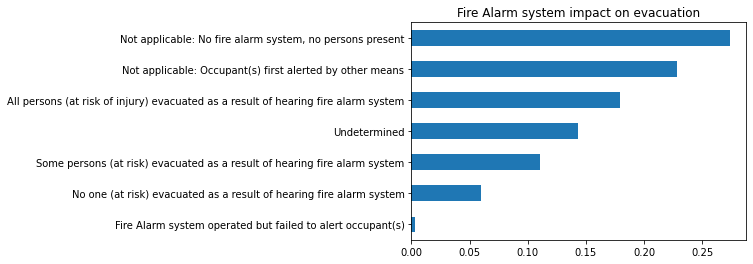

In [61]:
# Let's plot a graph for the same.
plt.title('Fire Alarm system impact on evacuation')
fire_df['Fire_Alarm_System_Impact_on_Evacuation'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

This shows in 50% of the fire incidents, fire alarm wasn't present. 

It shows 22% of entries are 'Undetermined', the second most common value is the stove/range-top burner

In [62]:
# Let's analyse what type of Smoke alarm was present.
fire_df['Smoke_Alarm_at_Fire_Origin_Alarm_Type'].value_counts(normalize=True)*100

Not applicable - no smoke alarm or presence undetermined    22.910907
Battery operated                                            21.225363
Hardwired (standalone)                                      20.297869
Interconnected                                              18.425042
Type undetermined                                           16.926781
Wireless                                                     0.214037
Name: Smoke_Alarm_at_Fire_Origin_Alarm_Type, dtype: float64

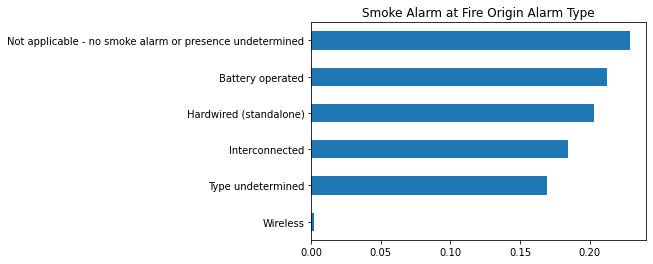

In [63]:
# Let's plot a graph for the same.
plt.title('Smoke Alarm at Fire Origin Alarm Type')
fire_df['Smoke_Alarm_at_Fire_Origin_Alarm_Type'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

In [64]:
# Let's analyse if Smoke alarm worked or failed .
fire_df['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].value_counts(normalize=True)*100

Not applicable: Alarm operated OR presence/operation undetermined    69.294569
Remote from fire – smoke did not reach alarm                          9.925979
Reason for inoperation undetermined                                   5.502542
Other reason                                                          5.386605
Separated from fire (e.g. wall, etc)                                  3.495942
No battery                                                            1.667707
Unit failure                                                          1.542852
Dead battery                                                          1.346651
Electrical line or battery not connected                              1.123696
Improper installation of unit                                         0.401320
Tampered with (vandalism)                                             0.312138
Name: Smoke_Alarm_at_Fire_Origin_Alarm_Failure, dtype: float64

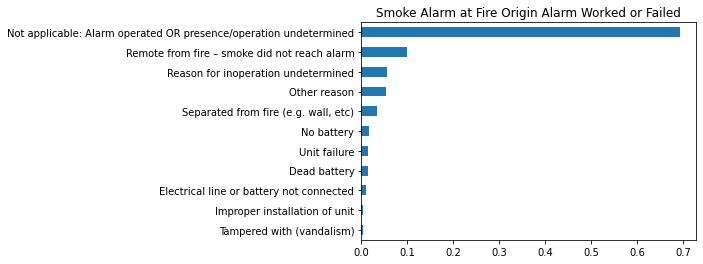

In [65]:
# Let's plot a graph for the same.
plt.title('Smoke Alarm at Fire Origin Alarm Worked or Failed')
fire_df['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

## Let's analyse Loss of Life or Injuries caused due to Fire incidents.

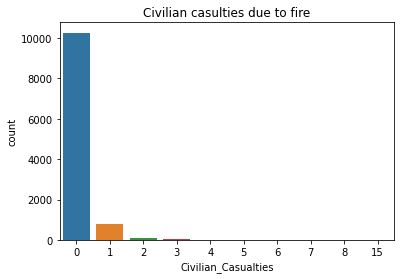

In [68]:
plt.title('Civilian casulties due to fire')
sns.countplot(data=fire_df, x='Civilian_Casualties')
plt.show()

Since most data has a value of 0 the plots don't show the values very well. To show all the values the following plots exclude all 0 values.

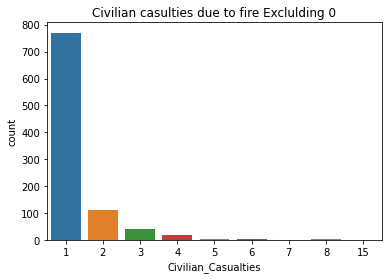

In [69]:
plt.title('Civilian casulties due to fire Exclulding 0')
casualties_nozero = fire_df[(fire_df.Civilian_Casualties > 0)]
sns.countplot(data=casualties_nozero, x='Civilian_Casualties')
plt.show()

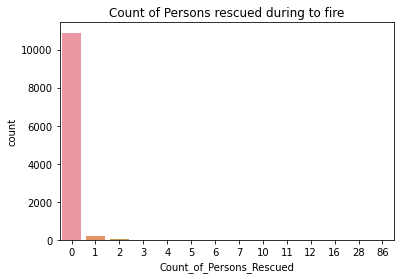

In [70]:
plt.title('Count of Persons rescued during to fire')
sns.countplot(data=fire_df, x='Count_of_Persons_Rescued')
plt.show()

Since most data has a value of 0 the plots don't show the values very well. To show all the values the following plots exclude all 0 values.

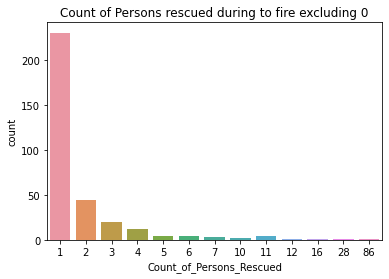

In [71]:
plt.title('Count of Persons rescued during to fire excluding 0')
rescued_nozero = fire_df[(fire_df.Count_of_Persons_Rescued > 0)]
sns.countplot(data=rescued_nozero, x='Count_of_Persons_Rescued')
plt.show()

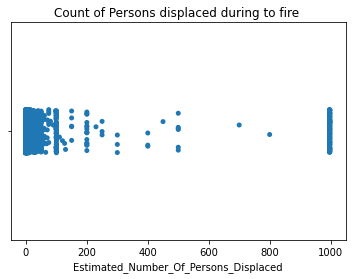

In [73]:
plt.title('Count of Persons displaced during to fire ')
sns.stripplot(data=fire_df, x='Estimated_Number_Of_Persons_Displaced')
plt.show()

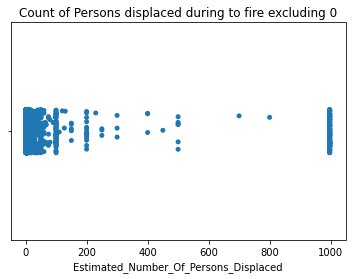

In [72]:
plt.title('Count of Persons displaced during to fire excluding 0')
displaced_nozero = fire_df[(fire_df.Estimated_Number_Of_Persons_Displaced > 0)]
sns.stripplot(data=displaced_nozero, x='Estimated_Number_Of_Persons_Displaced')
plt.show()

In the persons displaced plot there seems to be a lot of values around 1000 while a majority of other values fall under 200, this is strange.

In [74]:
len(fire_df[(fire_df.Estimated_Number_Of_Persons_Displaced > 900)])

157

All of these values are exactly 997. there seems to be no relation between civilian casualties, persons rescued, dollar loss and persons displaced when persons displaced is 997, this value appears to be a placeholder or unknown category.

In [75]:
fire_df = fire_df[(fire_df.Estimated_Number_Of_Persons_Displaced < 900)]

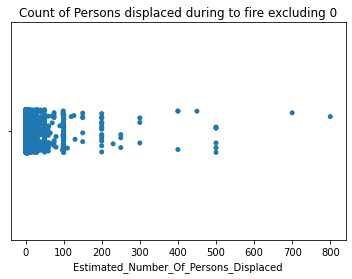

In [76]:
plt.title('Count of Persons displaced during to fire excluding 0')
displaced_nozero = fire_df[(fire_df.Estimated_Number_Of_Persons_Displaced > 0)]
sns.stripplot(data=displaced_nozero, x='Estimated_Number_Of_Persons_Displaced')
plt.show()